<a href="https://colab.research.google.com/github/bonareri/Machine_Learning_1/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction and Retention Strategy Optimization**

 Customer churn refers to the percentage of customers who stop using a company’s services during a specific period.

# 1. Importing the Dependencies

In [113]:
# Impoting general libraries
import warnings
import itertools
import random
import sklearn

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, PolynomialFeatures

# Class Imbalance
from imblearn.over_sampling import SMOTE

# CV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from imblearn.ensemble import BalancedRandomForestClassifier

# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.metrics import classification_report

import pickle
warnings.filterwarnings(action="ignore")
%matplotlib inline

## 2. Loading Data and Understanding

In [78]:
# Load the uploaded dataset
customer_churn = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## DATA CLEANING

In [80]:
# Drop unnesecary columns
customer_churn.drop(columns=['customerID'], inplace=True)

In [81]:
customer_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [82]:
#printing unique values in all the columns
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in customer_churn.columns:
    if col not in numerical_features:
      print(col, customer_churn[col].unique())
      print("_"*50)

gender ['Female' 'Male']
__________________________________________________
SeniorCitizen [0 1]
__________________________________________________
Partner ['Yes' 'No']
__________________________________________________
Dependents ['No' 'Yes']
__________________________________________________
PhoneService ['No' 'Yes']
__________________________________________________
MultipleLines ['No phone service' 'No' 'Yes']
__________________________________________________
InternetService ['DSL' 'Fiber optic' 'No']
__________________________________________________
OnlineSecurity ['No' 'Yes' 'No internet service']
__________________________________________________
OnlineBackup ['Yes' 'No' 'No internet service']
__________________________________________________
DeviceProtection ['No' 'Yes' 'No internet service']
__________________________________________________
TechSupport ['No' 'Yes' 'No internet service']
__________________________________________________
StreamingTV ['No' 'Yes' 'No internet 

In [83]:
customer_churn[customer_churn['TotalCharges'] ==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [84]:
len(customer_churn[customer_churn['TotalCharges'] ==" "])

11

In [85]:
customer_churn["TotalCharges"] = customer_churn["TotalCharges"].replace({" ": "0.0"})

In [86]:
#Convert TotalCharges to numeric:
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].astype(float)

In [87]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [88]:
#checking the distribution of target column
print(customer_churn['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Insights**
1. Removed customer ID as it is not required for modelling
2. No missing values in the dataset
3. Missing values in the Total Charges column were replaced with 0
4. Class imbalanced identified in the target

## 3. Exploratory Data Analysis (EDA)

In [89]:
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Numerical Features Analysis

Understanding the distribution of numerical features

In [18]:
def plot_histograms(customer_churn, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(customer_churn[column_name], kde=True)
  plt.title(f'Distribution of {column_name}')

  #calculate mean and median used for the columns
  col_mean = customer_churn[column_name].mean()
  col_median = customer_churn[column_name].median()

  #Add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

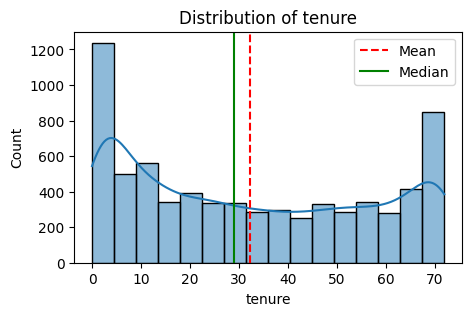

In [19]:
plot_histograms(customer_churn, "tenure")

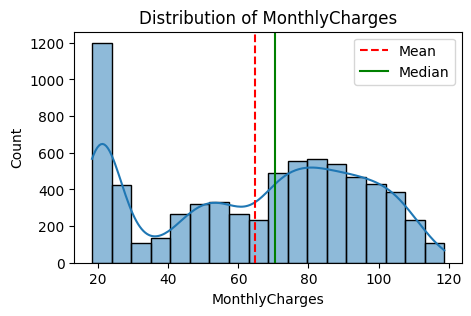

In [20]:
plot_histograms(customer_churn, "MonthlyCharges")

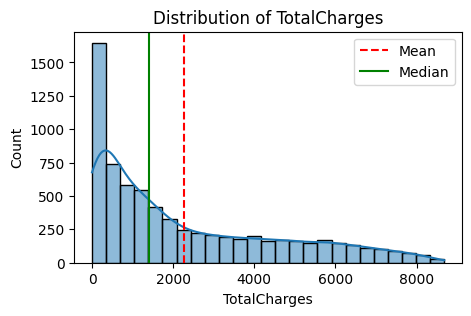

In [21]:
plot_histograms(customer_churn, "TotalCharges")

### Box plot for numerical columns

In [22]:
def plot_boxplot(customer_churn, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=customer_churn[column_name])
  plt.title(f'Box Plot of {column_name}')
  plt.ylabel(column_name)
  plt.show()

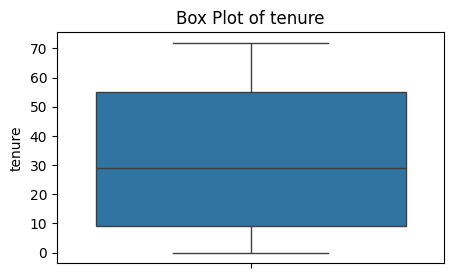

In [23]:
plot_boxplot(customer_churn, "tenure")

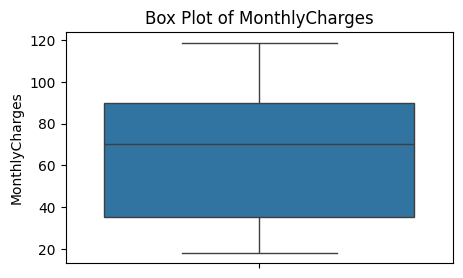

In [24]:
plot_boxplot(customer_churn, "MonthlyCharges")

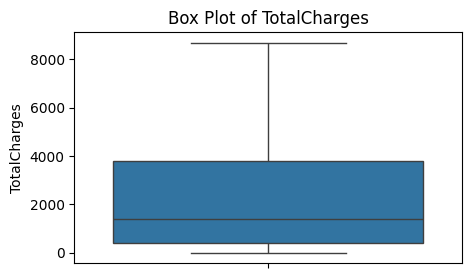

In [25]:
plot_boxplot(customer_churn, "TotalCharges")

**Correlation heatmap for numerical columns**

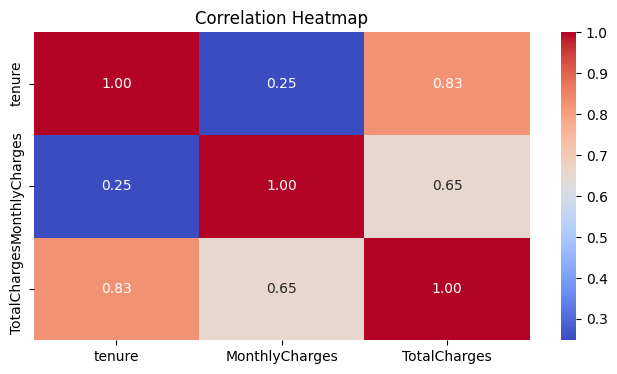

In [26]:
#Correlation matrix - heatmap
plt.figure(figsize=(8,4))
sns.heatmap(customer_churn[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Categorical Features Analysis**

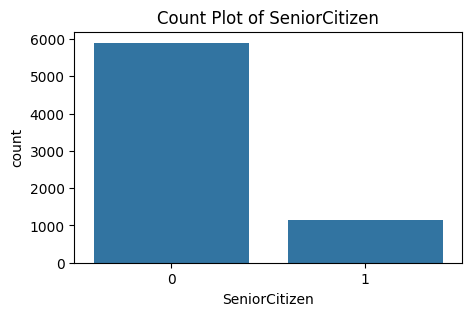

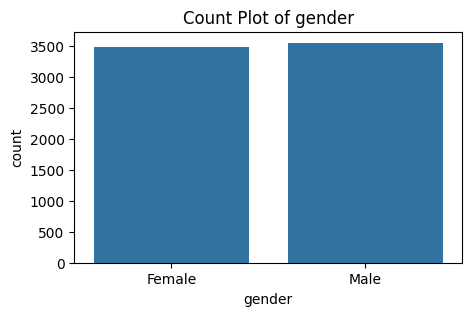

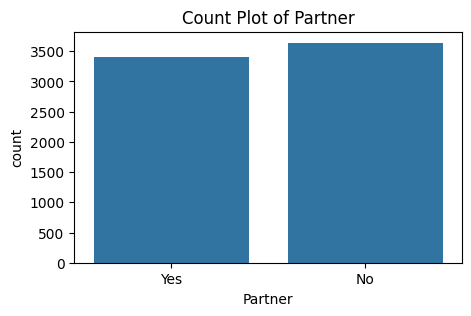

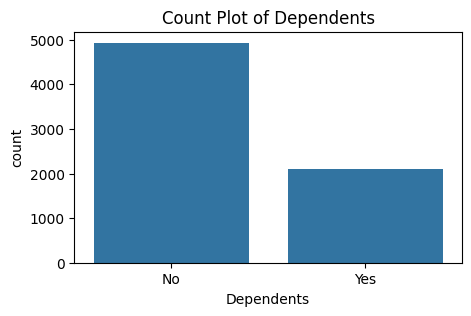

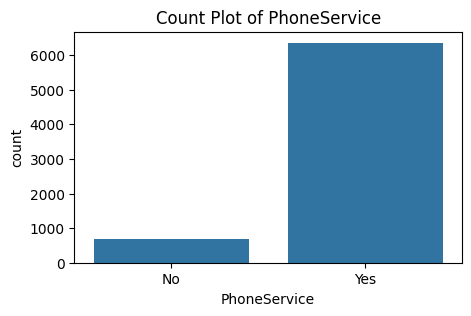

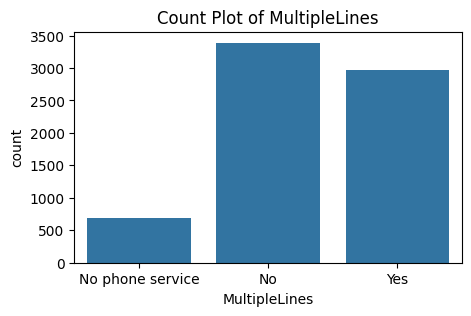

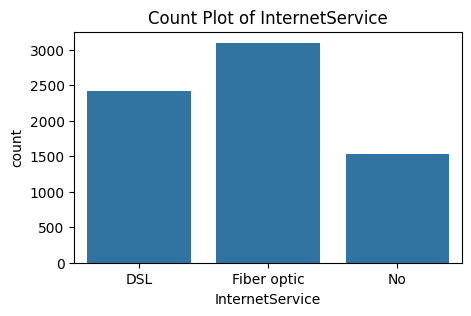

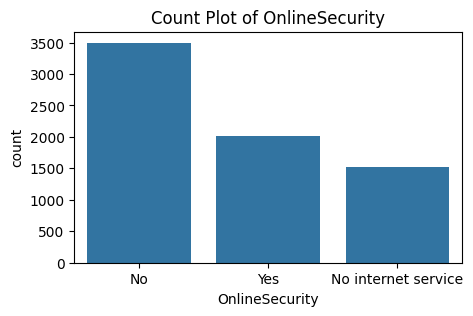

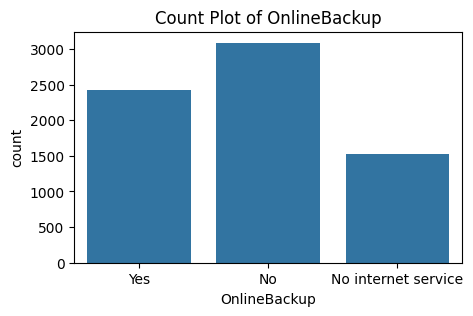

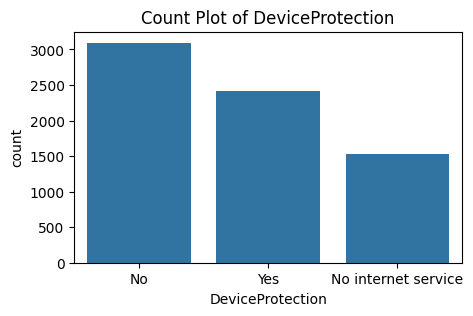

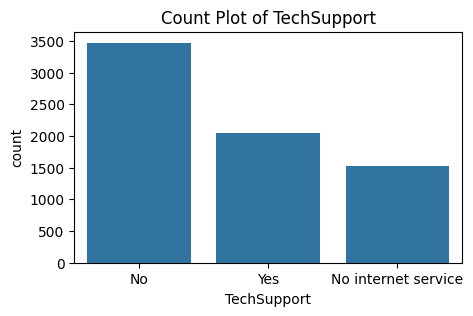

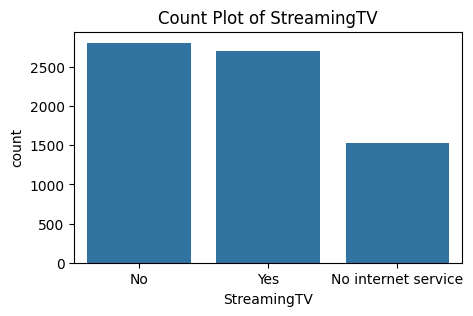

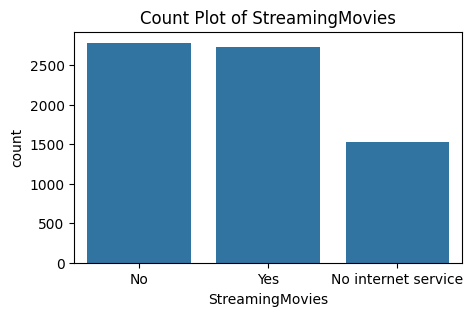

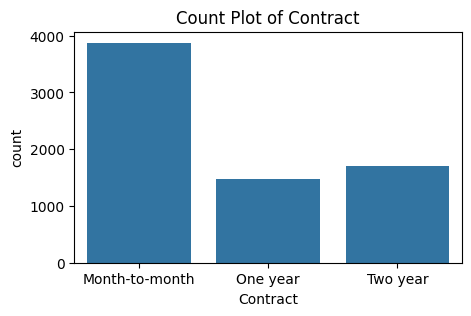

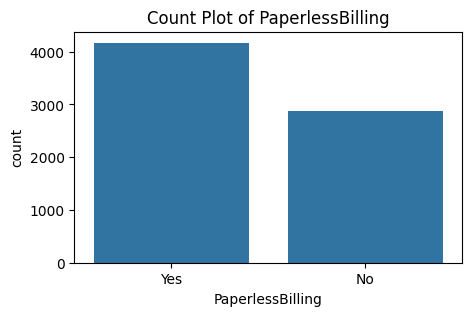

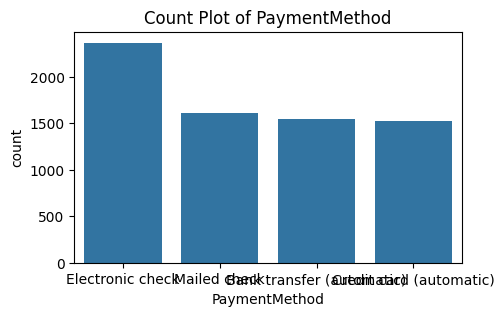

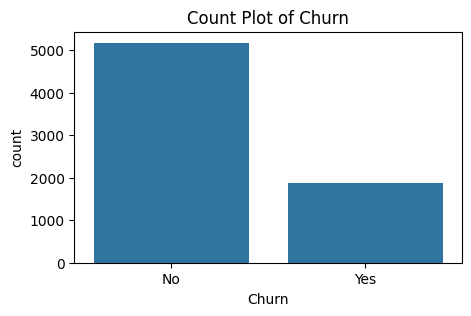

In [27]:
object_cols = customer_churn.select_dtypes(include=['object']).columns.tolist()
object_cols = ["SeniorCitizen"] + object_cols
# object_cols

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=customer_churn[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

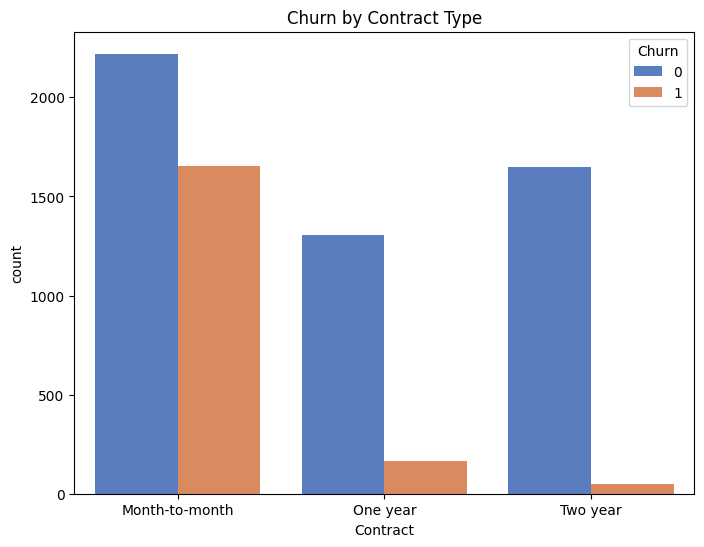

In [ ]:
# Churn by Contract Type
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_churn, x='Contract', hue='Churn', palette='muted')
plt.title('Churn by Contract Type')
plt.show()

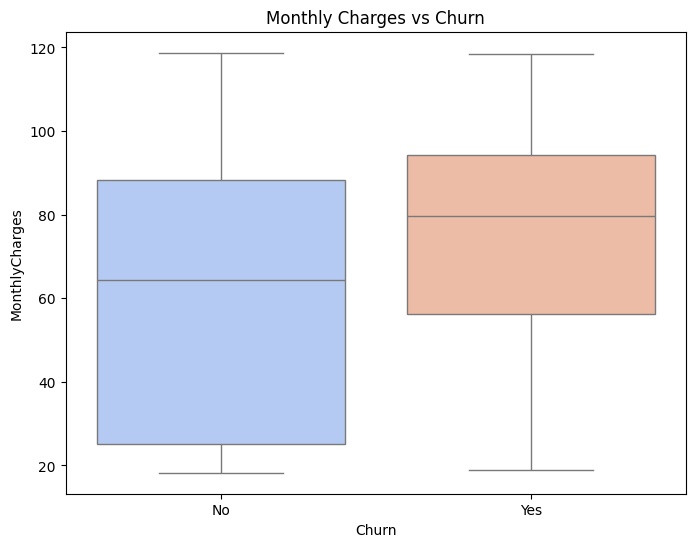

In [ ]:
# MonthlyCharges vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=customer_churn, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title('Monthly Charges vs Churn')
plt.show()

### Pairplot for selected features and the target variable

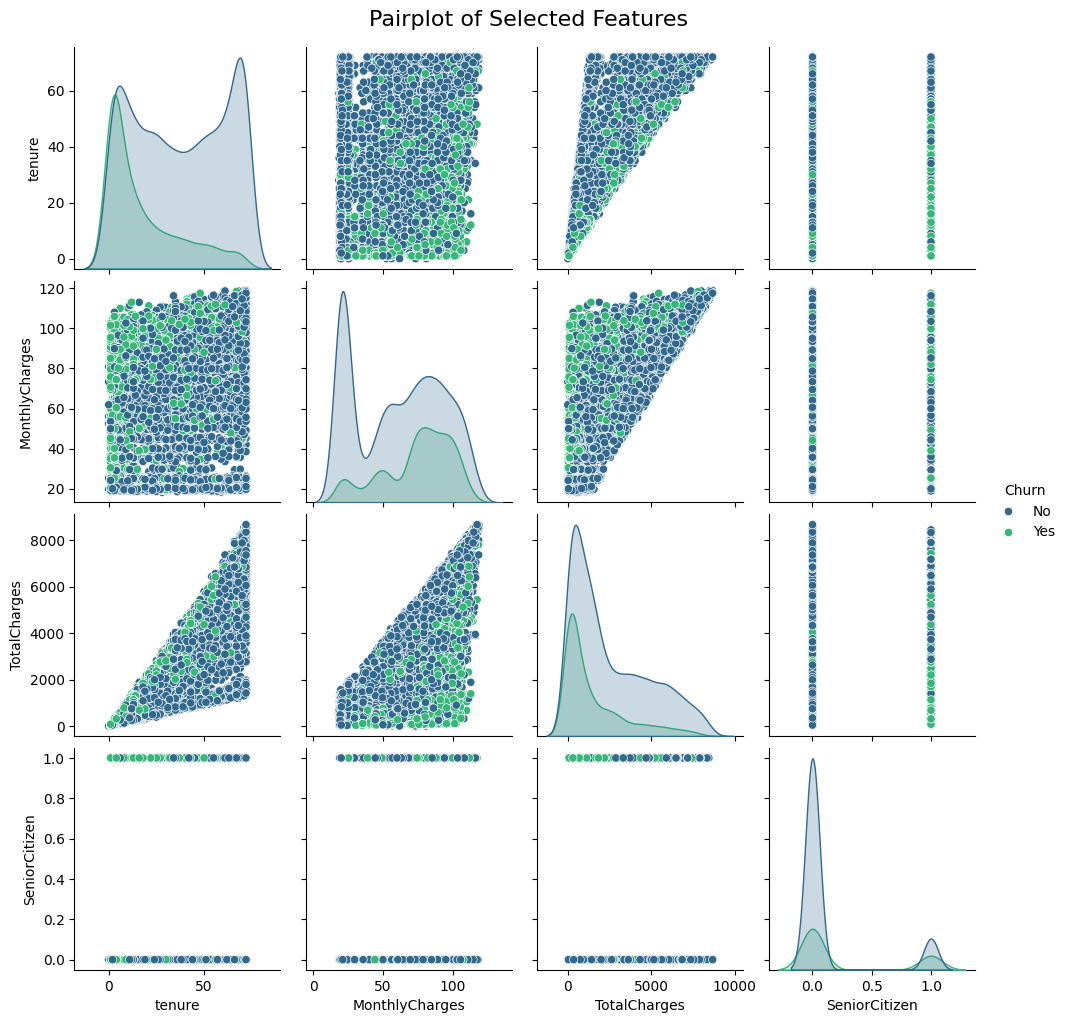

In [28]:
selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents']
sns.pairplot(customer_churn[selected_features + ['Churn']], hue='Churn', palette="viridis", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", fontsize=16, y=1.02)
plt.show()

Churn
0    5174
1    1869
Name: count, dtype: int64


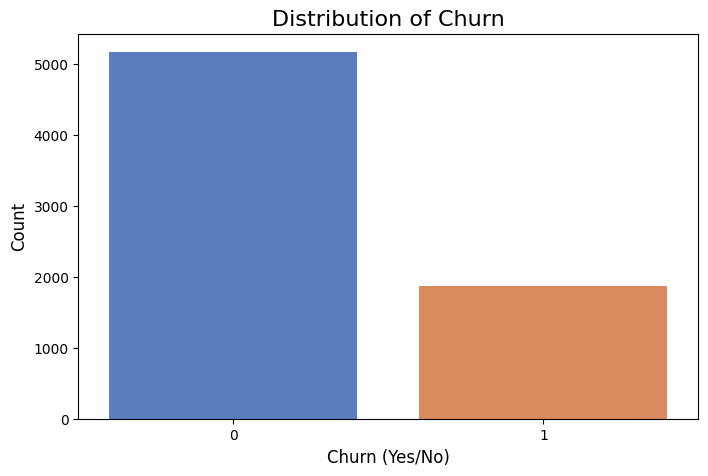

In [ ]:
# Check the value counts for the 'Churn' column
churn_counts = customer_churn['Churn'].value_counts()
print(churn_counts)

# Bar plot to visualize the distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_churn, x='Churn', palette="muted")
plt.title("Distribution of Churn", fontsize=16)
plt.xlabel("Churn (Yes/No)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

## 4. Data Prepocessing

### Encode Categorical Variables

#### Label encoding for target variable

In [90]:
customer_churn['Churn'] = customer_churn['Churn'].replace({'Yes': 1, 'No': 0})

In [91]:
customer_churn['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


#### Label encoding for categorical features

In [92]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create a copy of the original dataset
customer_churn_encoded = customer_churn.copy()

# Apply label encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    customer_churn_encoded[col] = label_encoder.fit_transform(customer_churn_encoded[col])

# Check the data types again
customer_churn_encoded.dtypes


,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64


In [93]:
customer_churn_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


###Scaling Numerical Columns

In [94]:
# Columns to scale
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize RobustScaler
robust_scaler = RobustScaler()

# Apply RobustScaler to all numerical columns
customer_churn[numerical_cols] = robust_scaler.fit_transform(customer_churn[numerical_cols])

# Display the scaled dataset
print(customer_churn[numerical_cols].head())

     tenure  MonthlyCharges  TotalCharges
0 -0.608696       -0.745170     -0.402798
1  0.108696       -0.246550      0.146087
2 -0.586957       -0.303588     -0.379687
3  0.347826       -0.516099      0.131698
4 -0.586957        0.006440     -0.366848


### **Training and Test Data Split**

In [95]:
#spliting the features and target
X = customer_churn_encoded.drop('Churn', axis=1)
y = customer_churn_encoded['Churn']

In [96]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# Verify the shape of the split data
print(f"X_train shape: {X_train.shape}")

X_train shape: (5634, 19)


### Handle Imbalanced Data
 Synthetic Minority Oversampling Technique (SMOTE)

In [98]:
# Step 2: Apply SMOTE only on the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## 5. Model Training

### SVM with RBF Kernel

In [114]:
# Cross-validation to get more reliable metrics
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(SVC(kernel='rbf', random_state=42), X_train_smote, y_train_smote, cv=cv, scoring='accuracy')

In [115]:
# Print average cross-validation accuracy
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-validation accuracy: 0.6408 ± 0.0074


In [116]:
# Fit the model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

SVC(random_state=42)

In [117]:
# Predict on the test set
y_pred = svm_model.predict(X_test)

In [118]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[733 303]
 [136 237]]


In [119]:
# F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

F1-score: 0.5192


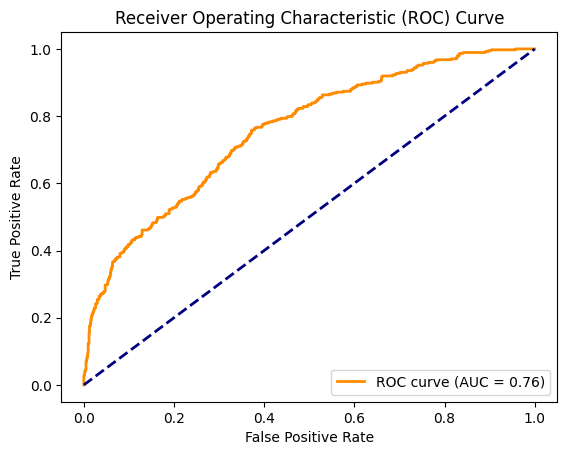

In [120]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, svm_model.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

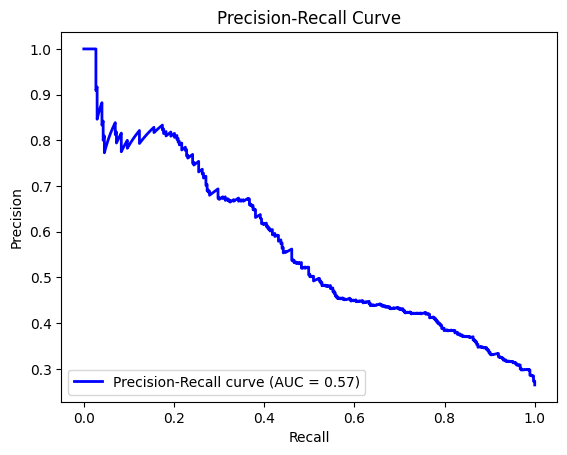

In [121]:
# Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, svm_model.decision_function(X_test))
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [122]:
# Evaluate the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1036
           1       0.44      0.64      0.52       373

    accuracy                           0.69      1409
   macro avg       0.64      0.67      0.64      1409
weighted avg       0.74      0.69      0.70      1409



### Random Forest Classifier

In [123]:
# Cross-validation to get more reliable metrics
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')

In [124]:
# Print average cross-validation accuracy
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-validation accuracy: 0.8467 ± 0.0019


In [125]:
# Fit the model
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [126]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [127]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix:\n{cm_rf}")

Confusion Matrix:
[[878 158]
 [154 219]]


In [128]:
# F1-score
f1_rf = f1_score(y_test, y_pred_rf)
print(f"F1-score: {f1_rf:.4f}")

F1-score: 0.5840


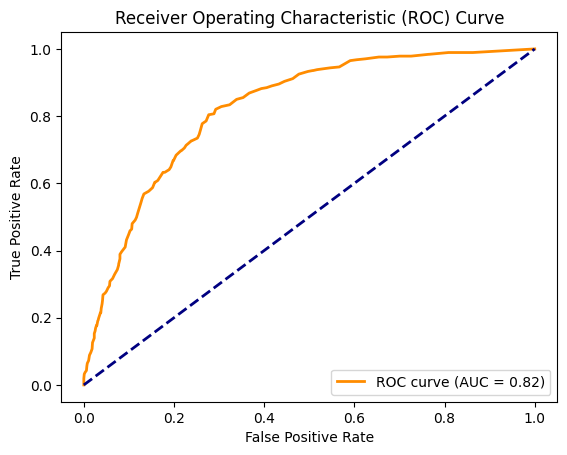

In [129]:
# ROC Curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

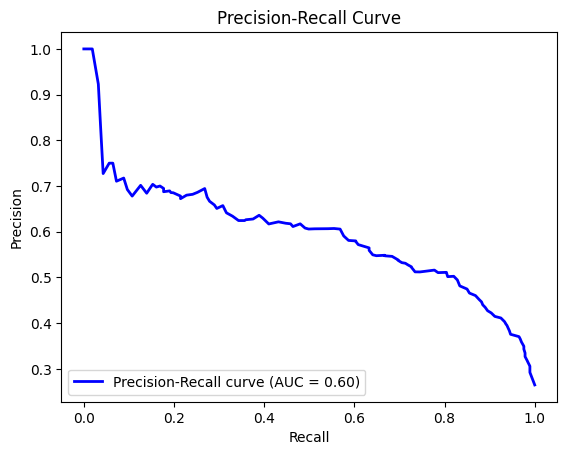

In [130]:
# Precision-Recall Curve and AUC
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
pr_auc_rf = auc(recall_rf, precision_rf)
plt.figure()
plt.plot(recall_rf, precision_rf, color='b', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc_rf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [131]:
# Evaluate the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



### Hyperparameter Tuning

In [132]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 201, 10),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for splitting a node
    'bootstrap': [True, False],  # Whether to use bootstrap samples or not
}

In [133]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV with 5-fold cross-validation and 10 iterations
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [134]:
# Fit the random search
random_search.fit(X_train_smote, y_train_smote)

# Best hyperparameters from the random search
print("Best hyperparameters found:", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters found: {'n_estimators': 180, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}


In [135]:
# Best model from random search
best_rf_model = random_search.best_estimator_

# Predict on the test data
y_pred_best = best_rf_model.predict(X_test)

In [136]:
# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Accuracy with Random Forest: {accuracy_best:.4f}")

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))

Best Accuracy with Random Forest: 0.7715
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1036
           1       0.56      0.62      0.59       373

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.77      0.77      1409



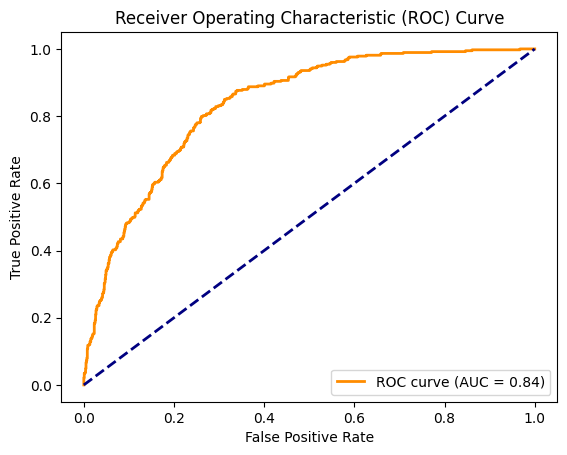

In [137]:
# ROC Curve and AUC
fpr_best_rf, tpr_best_rf, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
roc_auc_best_rf = auc(fpr_best_rf, tpr_best_rf)
plt.figure()
plt.plot(fpr_best_rf, tpr_best_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_best_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

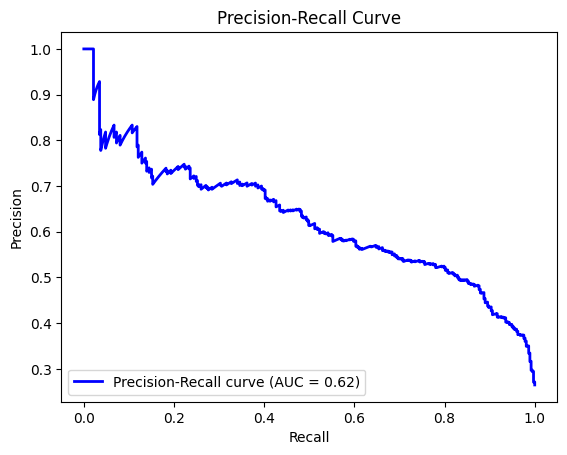

In [138]:
# Precision-Recall Curve and AUC
precision_best_rf, recall_best_rf, _ = precision_recall_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
pr_auc_best_rf = auc(recall_best_rf, precision_best_rf)
plt.figure()
plt.plot(recall_best_rf, precision_best_rf, color='b', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc_best_rf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

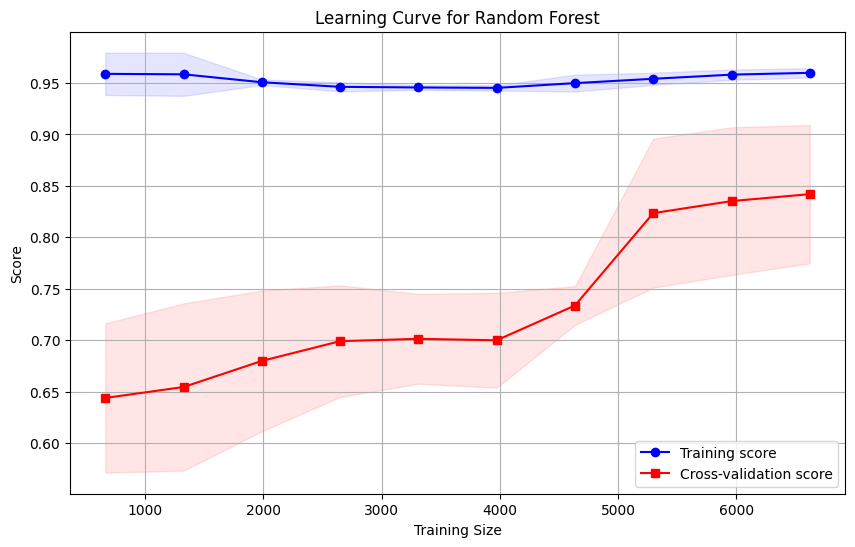

In [139]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X_train_smote, y_train_smote, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate mean and std for train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='b', marker='o', label='Training score')
plt.plot(train_sizes, test_mean, color='r', marker='s', label='Cross-validation score')

# Plot fill between for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1)

plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()